# <center>Experiment 10</center>

## Cifar10 classification with and without normalization CNN as classification model for the Cifar10 dataset CNN as classification model for the Cifar10 dataset


Now, these images are taken in varying lighting conditions and at different angles, and since these are colored images, you will see that there are many variations in the color itself of similar objects (for example, the color of ocean water). If you use the simple CNN architecture that we saw in the MNIST example above, you will get a low validation accuracy of around 60%.

That’s a key reason why I recommend CIFAR-10 as a good dataset to practice your hyperparameter tuning skills for CNNs. The good thing is that just like MNIST, CIFAR-10 is also easily available in Keras.ing:

In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical  # Updated import

# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)  # Updated to_categorical function
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)
Epoch 1/10
391/391 [==============================] - 327s 829ms/step - loss: 1.5862 - accuracy: 0.4177 - val_loss: 1.1469 - val_accuracy: 0.5976
Epoch 2/10
391/391 [==============================] - 322s 823ms/step - loss: 1.1103 - accuracy: 0.6065 - val_loss: 0.9505 - val_accuracy: 0.6668
Epoch 3/10
391/391 [==============================] - 551s 1s/step - loss: 0.9336 - accuracy: 0.6744 - val_loss: 0.8704 - val_accuracy: 0.6912
Epoch 4/10
391/391 [==============================] - 184s 471ms/step - loss: 0.8229 - accuracy: 0.7133 - val_loss: 0.7506 - val_accuracy: 0.7367
Epoch 5/10
391/391 [==============================] - 212s 542ms/step - loss: 0.7303 - accuracy: 0.7440 - val_loss: 0.7162 - val_accuracy: 0.7516
Epoch 6/10
391/391 [==============================] - 211s 540ms/step - loss: 0.6683 - accuracy: 0.7682 - val_loss: 0.6917 - val_accuracy: 0.7591
Epoch 7/10
391/391 [=====================

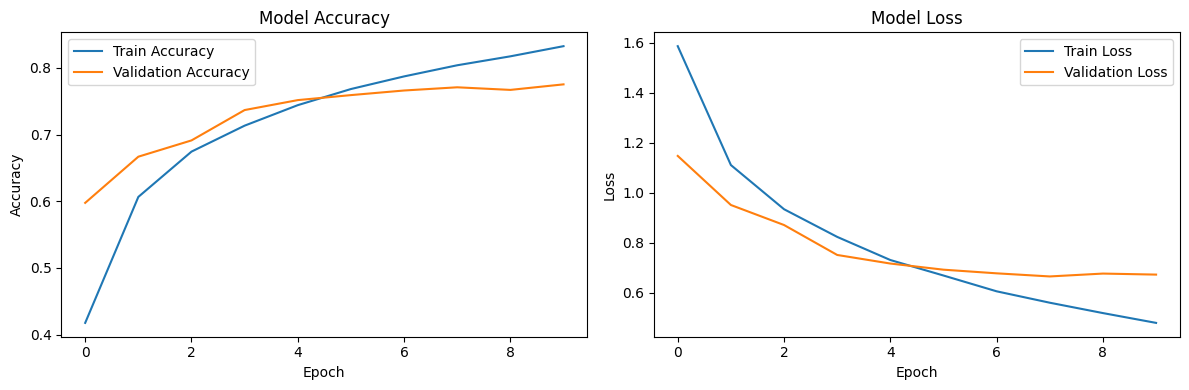

In [5]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 [==============================] - 9s 29ms/step


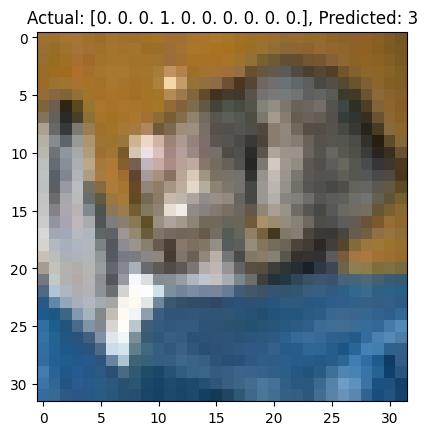

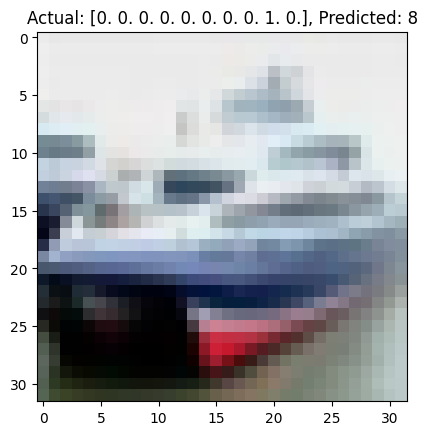

In [14]:
# Make predictions on your dataset
y_predicted = model.predict(X_test)

# Display images with actual and predicted labels
import matplotlib.pyplot as plt
count=0

for i in range(len(X_test)):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {Y_test[i]}, Predicted: {y_predicted[i].argmax()}")
    count=count+1
    if (count>=2):
        break
    plt.show()